In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

url = 'https://raw.githubusercontent.com/krishnaik06/AQI-Project/master/Data/Real-Data/Real_Combine.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df.dropna()

In [3]:

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features


# Splitting into train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Fitting the Regression model

In [5]:

import xgboost as xgb
xgb_model=xgb.XGBRegressor()

# Fitting the model
xgb_model.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

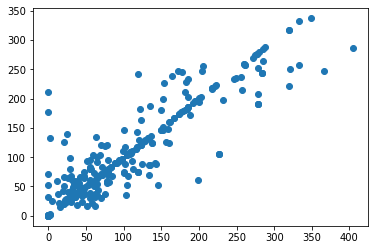

In [7]:

prediction=xgb_model.predict(X_test)

plt.scatter(y_test,prediction)


In [8]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, prediction))

MSE: 1344.4213246754996


In [10]:
import pickle
# open a file, where you ant to store the data
file = open('XG_boost_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgb_model, file)